In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#把矩阵转化为数据帧
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
Xtrain,Xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

In [9]:
Xtrain.shape

(124, 13)

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest) #返回预测的精准度

score

0.9259259259259259

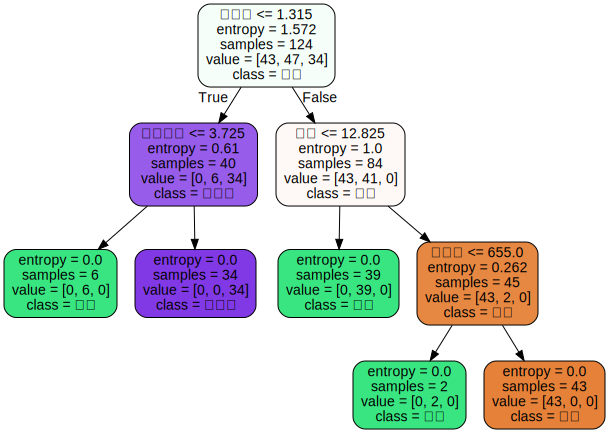

In [11]:
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=['雪莉','琴酒','伏特加']
                                ,filled=True#填充颜色 
                                ,rounded=True #框的形状
)
graph = graphviz.Source(dot_data)
graph

In [12]:
clf.feature_importances_

array([0.37015168, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.44417338, 0.        , 0.        , 0.12512654,
       0.        , 0.        , 0.0605484 ])

In [13]:
[*zip(feature_names,clf.feature_importances_)]

[('酒精', 0.37015167968810747),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.444173377360247),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.12512653920261116),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.06054840374903442)]

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=10)
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest) #返回预测的精准度

score

0.9259259259259259

In [15]:
#splitter表示决策树的随机选择特征，可以防止过拟合
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                 ,splitter='random')
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest) #返回预测的精准度

score

0.9259259259259259

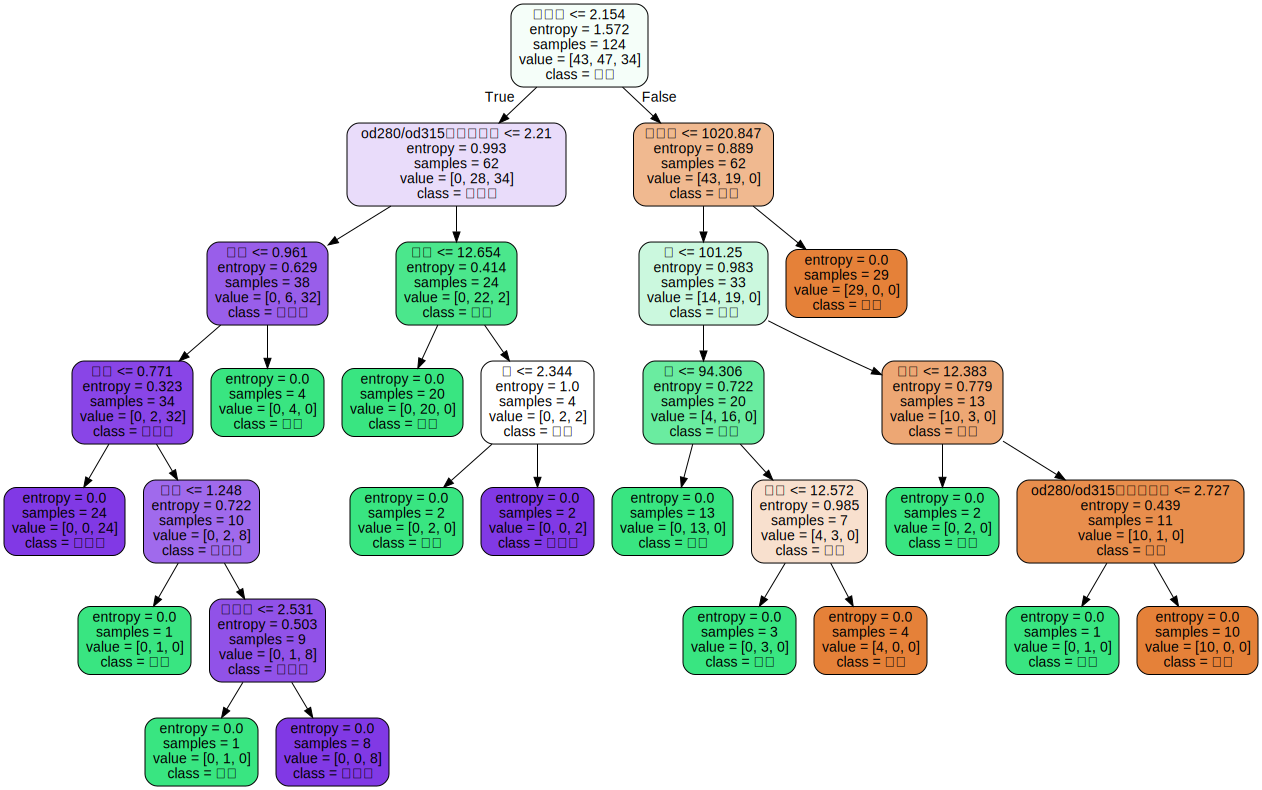

In [16]:
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=['雪莉','琴酒','伏特加']
                                ,filled=True#填充颜色 
                                ,rounded=True #框的形状
)
graph = graphviz.Source(dot_data)
graph

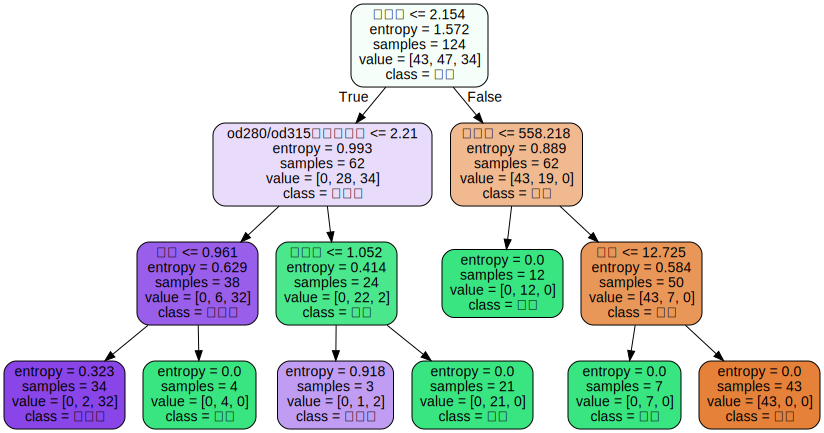

In [37]:
#剪枝参数
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                 ,splitter='random'
                                 ,max_depth=3
#                                  ,min_samples_leaf=10
#                                  ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain,ytrain)


dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=['雪莉','琴酒','伏特加']
                                ,filled=True#填充颜色 
                                ,rounded=True #框的形状
)
graph = graphviz.Source(dot_data)
graph

In [38]:
score = clf.score(Xtest,ytest) #返回预测的精准度
score

0.9444444444444444

In [ ]:
#剪枝参数max_depth,min_samples_leaf,min_samples_split

clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                 ,splitter='random'
                                 ,max_depth=3
#                                  ,min_samples_leaf=10
#                                  ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain,ytrain)


dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=['雪莉','琴酒','伏特加']
                                ,filled=True#填充颜色 
                                ,rounded=True #框的形状
)
graph = graphviz.Source(dot_data)
graph

In [ ]:
score = clf.score(Xtest,ytest) #返回预测的精准度
score

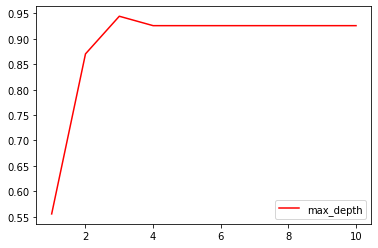

In [42]:
#超参数的学习曲线。 不同参数下的，模型的度量指标表现的线
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1
                                    ,criterion = 'entropy'
                                    ,random_state = 30
                                    ,splitter = 'random'
    )
    clf = clf.fit(Xtrain,ytrain)
    score = clf.score(Xtest,ytest)
    test.append(score)

plt.plot(range(1,11),test,color = 'red',label = 'max_depth')
plt.legend()
plt.show()

In [43]:
#返回每个测试样本所在的叶节点的索引
clf.apply(Xtest)

array([22, 27,  4, 12,  4, 28,  4, 28, 10, 28,  4,  4, 12, 19,  4, 28, 28,
       22, 14, 19, 28,  4, 28, 12,  4, 28, 27,  4, 14, 21, 12, 19, 28, 28,
        9,  4,  4, 12, 12, 12, 19, 19, 19,  9, 28, 28,  4, 27, 12, 27, 14,
        4, 19,  9], dtype=int64)

In [44]:
#返回每个测试样本的分类结果
clf.predict(Xtest)

array([0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 1, 2])